In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'train', 'sample_submission.csv']


In [2]:
!rm -rf input

In [3]:
!cp -r ../input .

In [4]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt

In [5]:
path = Path('input/train/')

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,test='../test', ds_tfms=get_transforms(),valid_pct=0.25,size=299,bs=32,num_workers=0)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (3563 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Scentless Mayweed,Scentless Mayweed,Scentless Mayweed,Scentless Mayweed,Scentless Mayweed
Path: input/train;

Valid: LabelList (1187 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Charlock,Loose Silky-bent,Scentless Mayweed,Cleavers,Common Chickweed
Path: input/train;

Test: LabelList (794 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: EmptyLabelList
,,,,
Path: input/train

In [7]:
print(data.classes)
len(data.classes),data.c

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


(12, 12)

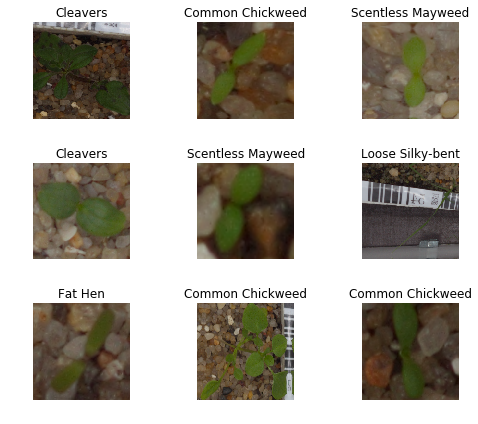

In [8]:
data.show_batch(rows=3,figsize=(7,6))

In [9]:
learn = create_cnn(data,models.resnet50,metrics=error_rate)

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
102502400it [00:24, 4122359.14it/s] 


In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


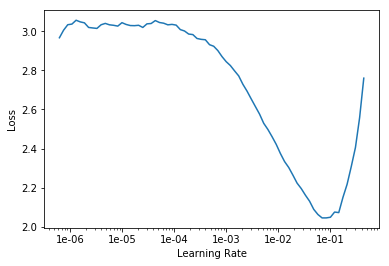

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(6,slice(1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.002228,0.458060,0.161752,02:30
1,0.543256,0.354062,0.102780,02:27
2,0.355519,0.276282,0.079191,02:28
3,0.255426,0.205973,0.069082,02:28
4,0.154364,0.171226,0.049705,02:28
5,0.118421,0.163327,0.044650,02:27


In [13]:
learn.save('stg-1')

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


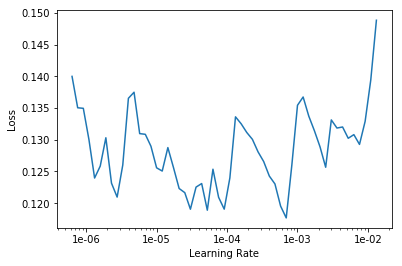

In [15]:
learn.recorder.plot()

In [16]:
#learn.load('stg-1')

In [17]:
learn.unfreeze()
learn.fit_one_cycle(4,max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.458117,1.422859,0.286436,02:38
1,0.356524,0.264259,0.078349,02:37
2,0.196162,0.148579,0.041281,02:36
3,0.102888,0.128597,0.036226,02:37


In [18]:
data = ImageDataBunch.from_folder(path,test='../test', ds_tfms=get_transforms(),valid_pct=0.25,size=350,bs=32,num_workers=0)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (3563 items)
x: ImageList
Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350)
y: CategoryList
Scentless Mayweed,Scentless Mayweed,Scentless Mayweed,Scentless Mayweed,Scentless Mayweed
Path: input/train;

Valid: LabelList (1187 items)
x: ImageList
Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350)
y: CategoryList
Loose Silky-bent,Cleavers,Loose Silky-bent,Black-grass,Fat Hen
Path: input/train;

Test: LabelList (794 items)
x: ImageList
Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350)
y: EmptyLabelList
,,,,
Path: input/train

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
from sklearn import metrics
print(metrics.classification_report(interp.y_true.numpy(), interp.pred_class.numpy(),target_names =data.classes))

                           precision    recall  f1-score   support

              Black-grass       0.80      0.83      0.81        63
                 Charlock       1.00      0.99      0.99        95
                 Cleavers       1.00      0.96      0.98        73
         Common Chickweed       0.96      0.98      0.97       140
             Common wheat       1.00      0.88      0.93        56
                  Fat Hen       0.98      1.00      0.99       106
         Loose Silky-bent       0.93      0.94      0.94       163
                    Maize       0.98      0.97      0.98        66
        Scentless Mayweed       0.97      0.99      0.98       142
          Shepherds Purse       0.98      0.94      0.96        54
Small-flowered Cranesbill       1.00      1.00      1.00       136
               Sugar beet       0.95      0.99      0.97        93

                micro avg       0.96      0.96      0.96      1187
                macro avg       0.96      0.95      0.96    

In [20]:
learn.save('stg-2')

In [21]:
learn.data=data

In [22]:
learn.unfreeze()
learn.fit_one_cycle(4,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.112538,0.049592,0.014322,03:08
1,0.087663,0.049010,0.016007,03:01
2,0.070286,0.044099,0.014322,03:01
3,0.064335,0.043625,0.014322,03:01


In [23]:
preds,y=learn.get_preds(ds_type=DatasetType.Test)

In [24]:
preds = np.argmax(preds, axis = 1)
preds_classes = [data.classes[i] for i in preds]

In [25]:
submission = pd.DataFrame({ 'file': os.listdir('input/test'), 'species': preds_classes })
submission.to_csv('test_classification_results.csv', index=False)

In [26]:
submission

,file,species
0,e98e5d1d5.png,Black-grass
1,c0f5d9ac8.png,Small-flowered Cranesbill
2,4c8005bbc.png,Black-grass
3,df521c0c0.png,Loose Silky-bent
4,39858776a.png,Cleavers
5,0437393b1.png,Fat Hen
6,377283a21.png,Maize
7,6df8e31ea.png,Charlock
8,54c8bb900.png,Charlock
9,60f0bc617.png,Small-flowered Cranesbill


In [27]:
!rm -rf input